<a href="https://colab.research.google.com/github/juliakahan/Machine-Learning-/blob/main/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_iris 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
iris = load_iris(as_frame=True)

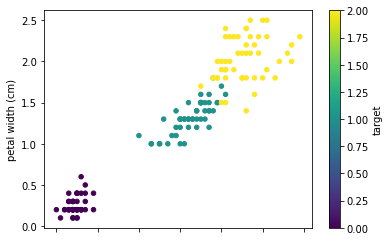

In [3]:
pd.concat([iris.data, iris.target], axis=1).plot.scatter( x='petal length (cm)',
y='petal width (cm)',
c='target',
colormap='viridis' )

In [4]:
X = iris.data[["petal length (cm)", "petal width (cm)"]]
y = iris.target

In [5]:
X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [6]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [8]:
#gatunków (0, 1, 2) zbuduj perceptron, przeprowadź jego uczenie i oceń jego dokładność dla zbioru uczącego i dla zbioru testowego.

In [9]:
from sklearn.linear_model import Perceptron
#0
per_clf_0 = Perceptron()
y_train_0 = (y_train == 0).astype(int)
y_test_0 = (y_test == 0).astype(int)
per_clf_0.fit(X_train,y_train_0)
y_train_0_pred = per_clf_0.predict(X_train)
y_test_0_pred = per_clf_0.predict(X_test)

#1
per_clf_1 = Perceptron()
y_train_1 = (y_train == 1).astype(int)
y_test_1 = (y_test == 1).astype(int)
per_clf_1.fit(X_train,y_train_1)
y_train_1_pred = per_clf_1.predict(X_train)
y_test_1_pred = per_clf_1.predict(X_test)

#2
per_clf_2 = Perceptron()
y_train_2 = (y_train == 2 ).astype(int)
y_test_2 = (y_test == 2).astype(int)
per_clf_2.fit(X_train,y_train_2)
y_train_2_pred = per_clf_2.predict(X_train)
y_test_2_pred = per_clf_2.predict(X_test)


In [10]:
#accuracy scores
from sklearn.metrics import accuracy_score
a_tr_0 = accuracy_score(y_train_0, y_train_0_pred)
a_te_0 = accuracy_score(y_test_0, y_test_0_pred)

a_tr_1 = accuracy_score(y_train_1, y_train_1_pred)
a_te_1 = accuracy_score(y_test_1, y_test_1_pred)

a_tr_2 = accuracy_score(y_train_2, y_train_2_pred)
a_te_2 = accuracy_score(y_test_2, y_test_2_pred)

per_acc = [(a_tr_0, a_te_0), (a_tr_1, a_te_1), (a_tr_2, a_te_2)]
per_acc

[(1.0, 1.0), (0.6583333333333333, 0.6), (0.975, 0.9666666666666667)]

In [11]:
per_wght = []
perceptron_clfs = [per_clf_0, per_clf_1, per_clf_2]

for perceptron in perceptron_clfs:
  w_0 = perceptron.intercept_[0]
  w_1 = perceptron.coef_[0][0]
  w_2 = perceptron.coef_[0][1]

  per_wght.append((w_0, w_1, w_2))

per_wght

[(1.0, 2.7, 4.9),
 (20.0, 19.29999999999996, -40.60000000000006),
 (-24.0, -40.40000000000003, -26.399999999999974)]

In [12]:
import pickle
with open('per_acc.pkl', 'wb') as fp:
    pickle.dump(per_acc, fp)

In [13]:
import pickle
with open('per_wght.pkl', 'wb') as fp:
    pickle.dump(per_wght, fp)

In [14]:
X = np.array([[0, 0], 
    [0, 1],
    [1, 0],
    [1, 1]])
y = np.array([0,
    1,
    1,
    0])

In [15]:
per_clf_xor = Perceptron()
per_clf_xor.fit(X, y)
y_pred = per_clf_xor.predict(X)
print(accuracy_score(y, y_pred))

w_0_xor = per_clf_xor.intercept_
w_1_xor = per_clf_xor.coef_
print(w_0, w_1)

0.5
-24.0 -40.40000000000003


In [16]:
import keras
import tensorflow as tf
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(2, activation = "tanh", use_bias = True, input_dim = 2))
model.add(keras.layers.Dense(1, activation = "sigmoid", use_bias = True))

model.compile(loss="binary_crossentropy", optimizer='sgd')

In [17]:
history = model.fit(X, y, epochs=100, verbose=False) 
print(history.history['loss'])

[0.7034916877746582, 0.7025628089904785, 0.7016465663909912, 0.700742781162262, 0.6998512148857117, 0.6989717483520508, 0.6981042623519897, 0.6972485780715942, 0.6964045763015747, 0.6955720782279968, 0.6947509050369263, 0.6939408779144287, 0.6931420564651489, 0.6923540234565735, 0.6915768384933472, 0.6908100843429565, 0.6900539994239807, 0.6893080472946167, 0.6885722875595093, 0.6878466606140137, 0.6871308088302612, 0.686424732208252, 0.6857283115386963, 0.6850412487983704, 0.684363603591919, 0.6836950778961182, 0.6830356121063232, 0.6823850274085999, 0.6817432641983032, 0.681110143661499, 0.6804854869842529, 0.6798692941665649, 0.679261326789856, 0.6786615252494812, 0.6780697107315063, 0.6774857640266418, 0.6769095659255981, 0.6763410568237305, 0.6757800579071045, 0.6752264499664307, 0.6746801137924194, 0.6741409301757812, 0.6736088991165161, 0.6730837821960449, 0.6725654602050781, 0.6720539331436157, 0.6715489625930786, 0.6710505485534668, 0.670558512210846, 0.6700727939605713, 0.669

In [18]:
model.predict(X)

array([[0.42921072],
       [0.46544844],
       [0.64275575],
       [0.56790084]], dtype=float32)

In [19]:
#1
model_1 = tf.keras.models.Sequential()
model_1.add(keras.layers.Dense(2, activation = "tanh", use_bias = True, input_dim = 2))
model_1.add(keras.layers.Dense(1, activation = "sigmoid", use_bias = True))

model_1.compile(loss="binary_crossentropy", optimizer='sgd')

history_1 = model_1.fit(X, y, epochs=100, verbose=False) 
model_1.predict(X)

array([[0.48616087],
       [0.35208225],
       [0.6931251 ],
       [0.48931175]], dtype=float32)

In [20]:
#2
model_2 = tf.keras.models.Sequential()
model_2.add(keras.layers.Dense(2, activation = "tanh", use_bias = True, input_dim = 2))
model_2.add(keras.layers.Dense(1, activation = "sigmoid", use_bias = True))

model_2.compile(loss="binary_crossentropy", optimizer='sgd')

history_2 = model_1.fit(X, y, epochs=100, verbose=False) 
model_2.predict(X)

array([[0.5       ],
       [0.23065084],
       [0.80395526],
       [0.5553432 ]], dtype=float32)

In [21]:
#3
model_3 = tf.keras.models.Sequential()
model_3.add(keras.layers.Dense(2, activation = "tanh", use_bias = True, input_dim = 2))
model_3.add(keras.layers.Dense(1, activation = "sigmoid", use_bias = True))

model_3.compile(loss="binary_crossentropy", optimizer='sgd')

history_3 = model_3.fit(X, y, epochs=100, verbose=False) 
model_3.predict(X)

array([[0.48177603],
       [0.3737018 ],
       [0.5865603 ],
       [0.44856262]], dtype=float32)

In [51]:
#using Adam with different values of learning_rate, different loss functions(MSE/BCE) and activation functions()

## 0.01, BCE, relu
model_4 = tf.keras.models.Sequential()
model_4.add(keras.layers.Dense(2, activation = "relu", use_bias = True, input_dim = 2))
model_4.add(keras.layers.Dense(1, activation = "sigmoid", use_bias = True))

model_4.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))

history_4 = model_4.fit(X, y, epochs=100, verbose=False) 
model_4.predict(X)


array([[0.49779588],
       [0.49947143],
       [0.5001184 ],
       [0.5017939 ]], dtype=float32)

In [41]:
## 0.05, MSE, RELU
model_5 = tf.keras.models.Sequential()
model_5.add(keras.layers.Dense(2, activation = "relu", use_bias = True, input_dim = 2))
model_5.add(keras.layers.Dense(1, activation = "sigmoid", use_bias = True))

model_5.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.05))

history_5 = model_5.fit(X, y, epochs=100, verbose=False) 
model_5.predict(X)

array([[0.08473492],
       [0.9618628 ],
       [0.96013486],
       [0.03686774]], dtype=float32)

In [31]:
model_6 = tf.keras.models.Sequential()
model_6.add(keras.layers.Dense(2, activation = "relu", use_bias = True, input_dim = 2))
model_6.add(keras.layers.Dense(1, activation = "sigmoid", use_bias = True))

model_6.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))

history_6 = model_4.fit(X, y, epochs=100, verbose=False) 
model_6.predict(X)

array([[0.5       ],
       [0.67226744],
       [0.64911306],
       [0.8855128 ]], dtype=float32)

In [55]:
while True:
  best_model = tf.keras.models.Sequential()
  best_model.add(keras.layers.Dense(2, activation = "relu", use_bias = True, input_dim = 2))
  best_model.add(keras.layers.Dense(1, activation = "sigmoid", use_bias = True))

  best_model.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))

  history_4_bm = best_model.fit(X, y, epochs=100, verbose=False) 
  best_results = best_model.predict(X)
  if best_results[0]<0.1 and best_results[1]>0.9 and best_results[2]>0.9 and best_results[0]<0.1:
    break
 #mlp_xor_weights.pkl
best_results


array([[0.0051536 ],
       [0.9992025 ],
       [0.99811256],
       [0.0051536 ]], dtype=float32)

In [56]:
mlp_xor_weights = best_model.get_weights()
with open('mlp_xor_weights.pkl', 'wb') as fp:
    pickle.dump(mlp_xor_weights, fp)